<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [29]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [30]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [31]:
##### WRITE YOUR CODE HERE #####

#### END CODE ####
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [32]:
##### WRITE YOUR CODE HERE #####

#### END CODE ####
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [33]:
##### WRITE YOUR CODE HERE #####

#### END CODE ####
def feature_standard(data ):
  ######## write your code #########
  mu = np.mean(data , axis=0)
  std=np.std(data , axis = 0)
  data_Scaled = (data - mu)/std
  return data_Scaled

Question 5: Scale your features, except the target. 

In [34]:
##### WRITE YOUR CODE HERE #####

#### END CODE #### scalefeutures
data.iloc[:,:-1] = feature_standard(data.iloc[: ,:-1])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [35]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)
  print(df.index,perm)
  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [36]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

RangeIndex(start=0, stop=768, step=1) [158 251 631 757 689 573 553 728 183 515 460 143 258 682  62 338 399  68
 707 236 744 484 704  99 488 146 231  20 569 289 766 540 494  77 464 185
  18 436 685 656 142 109  15 315 232 203 521  37 452 346 445 129  30 295
 386 594  22 473  67 334 198 691 391 675 764 684 455 172 530 439 637 372
 107 431 615 437 641  89 717 643  74 552 596 291 499 204 734 654 311 459
 490 700 379   1 128 178 541 345 495 174 280 480 633 310 741 565 193 567
 529 182 381 731 199 137 318 702 250 333 157  80 502 751 108 736 471 458
 197 160 722 638 267 181 486 525 558 598 141 479 340 314 322 673 297 575
 462 572 352 666 376 733 441 627  84  55 602 429 623 209 589 227 610 342
 503 544 475 600 601 579  16 513 275 192 257 321 176 559 213 309 581 640
 508 536 212 356 407  32 284 312 156 535 423 505 578 427 402 116 414 397
  10   3 369 317 226 737  13 164 586 524 690  40 670  65  72 721 288 113
 522 701 300 206 440 514 205 426 556 130 225 387 120   7 729 501 371 634
 221  12 171 

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [37]:
#from re import X
class logistic_regression:
    def __init__(self,x_test,y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
      ##### WRITE YOUR CODE HERE #####
      self.num_iters=num_iters
      self.threshold=threshold
      self.tolerance=tolerance
      self.lr=lr
      self.theta=None
      self.cost_history=[]
      self.cost_history_test=[]
      self.x_test=x_test
      self.y_test=y_test

      #### END CODE ####

    def add_ones(self, x):
      ##### WRITE YOUR CODE HERE #####
      return np.hstack([np.ones((x.shape[0],1)),x])
      #### END CODE ####

    def sigmoid(self, x, theta):
      ##### WRITE YOUR CODE HERE #####
      z = x @ theta #we don't put x.T because is not for one row but on every dataset
      s = 1 / (1 + np.exp(-z))
      return s
      #### END CODE ####

    def cross_entropy(self, x, y_true):
      ##### WRITE YOUR CODE HERE #####
      n =len(x) # Length of x
      # x_new=self.add_ones(x)
      y_pred = self.sigmoid(x, self.theta)
      Cost = - np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
      return Cost/n
      #### END CODE ####

    def fit(self, x,y):
      ##### WRITE YOUR CODE HERE #####
      x= self.add_ones(x) # Add ones to x
      y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
      self.theta= np.zeros((x.shape[1], 1)) # Initialize theta to zeros vector >>> (x.shape[1])
      current_iter= 1
      norm= 1

      self.x_test= self.add_ones(self.x_test) # Add ones to x
      self.y_test= self.y_test.reshape(-1,1) # reshape y. This is optional, do it if needed

      while (norm >= self.tolerance and current_iter < self.num_iters):
        theta_old = self.theta.copy() # Get old theta

        # make predictions
        y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

        # Gradient of cross-entropy
        grad= -x.T @ (y - y_pred)
        grad= grad.reshape(-1,1) # Reshape, if it is needed

        # update rules
        self.theta= self.theta - grad * self.lr
        # Compute the training loss

        training_loss=self.cross_entropy(x,y)
        self.cost_history.append(training_loss)

        test_loss=self.cross_entropy(self.x_test,self.y_test)
        self.cost_history_test.append(test_loss)

        # Convergence criteria:
        if current_iter%100 == 0:
          print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
        norm = np.linalg.norm(theta_old - self.theta)
        current_iter += 1
      #### END CODE ####
    


    def predict(self, x):
      proba= self.predict_proba(x) # Get probability of x
      result= [1 if i > self.threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
      return np.array(result) 
    
      
    def predict_proba(self, x):
      x=self.add_ones(x) # Apply add ones to x
      y_pred_prob= self.sigmoid(x, self.theta) # Predict proba with sigmoid
      return y_pred_prob
    
    def plot(self):
      ##### WRITE YOUR CODE HERE #####
      plt.xlabel('Epochs')
      plt.ylabel('Cost')
      plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
      plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
      plt.legend()
      plt.show()
      #### END CODE ####
      ##### WRITE YOUR CODE HERE #####
      
      #### END CODE ####

In [38]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test, y_test, num_iters=10000)

In [39]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6361937545081015
cost for 200 iteration : 0.5987906607943532
cost for 300 iteration : 0.5730690324377251
cost for 400 iteration : 0.5546046708720571
cost for 500 iteration : 0.54086589635088
cost for 600 iteration : 0.5303427167700747
cost for 700 iteration : 0.5220927387171681
cost for 800 iteration : 0.5155022467431675
cost for 900 iteration : 0.510156146914654
cost for 1000 iteration : 0.5057642731225686
cost for 1100 iteration : 0.5021179365422827
cost for 1200 iteration : 0.49906333436891454
cost for 1300 iteration : 0.49648471097216107
cost for 1400 iteration : 0.4942933591386856
cost for 1500 iteration : 0.4924202321546067
cost for 1600 iteration : 0.4908108549079812
cost for 1700 iteration : 0.4894217386345165
cost for 1800 iteration : 0.4882178035304924
cost for 1900 iteration : 0.48717049219831987
cost for 2000 iteration : 0.48625636634166375
cost for 2100 iteration : 0.4854560477947473
cost for 2200 iteration : 0.48475340903599096
cost for 2300 ite

In [40]:
pred= model.predict(x_test)

In [41]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.0621027 ]
 [0.14364075]
 [0.16770029]
 [0.05649998]
 [0.68656307]
 [0.59077239]
 [0.24011922]
 [0.24245529]
 [0.03851676]
 [0.18856335]
 [0.04468985]
 [0.30989675]
 [0.6543891 ]
 [0.01782879]
 [0.64128438]
 [0.05287078]
 [0.37171023]
 [0.49402766]
 [0.341567  ]
 [0.07367515]
 [0.27098316]
 [0.47521352]
 [0.43470765]
 [0.19201003]
 [0.25107223]
 [0.80400819]
 [0.11154124]
 [0.42469167]
 [0.41338548]
 [0.20698992]
 [0.03079193]
 [0.92110075]
 [0.07050737]
 [0.40547424]
 [0.07062423]
 [0.46365743]
 [0.72786897]
 [0.44583131]
 [0.11584159]
 [0.9547328 ]
 [0.09357638]
 [0.26586146]
 [0.83754169]
 [0.91433131]
 [0.2087228 ]
 [0.07891804]
 [0.23721354]
 [0.71758088]
 [0.4111789 ]
 [0.35725047]
 [0.25488846]
 [0.67704974]
 [0.73545972]
 [0.02285975]
 [0.42272291]
 [0.18641832]
 [0.30398741]
 [0.77636051]
 [0.14298036]
 [0.91329833]
 [0.94938528]
 [0.38777932]
 [0.12882725]
 [0.06987208]
 [0.1692367 ]
 [0.0835011 ]
 [0.06106942]
 [0.0546371 ]
 [0.38977273]
 [0.54234849]
 [0.59467355]
 [0.50

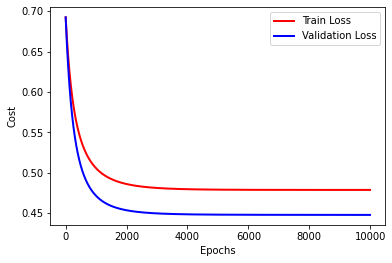

In [43]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{kaveku}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?